# Weather Prediction During World War 2 (Time Series Prediction)

## 1. Import the needed libraries

In [1]:
# To install plotly library use the below code.
# !pip install chart-studio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from chart_studio import plotly
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

## 2. Import the datasets

In [3]:
# bombing data
operations = pd.read_csv("operations.csv")

# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("Weather Station Locations.csv")

# Second weather data that includes measured min, max and mean temperatures
weather_summary = pd.read_csv("Summary of Weather.csv")

/var/folders/4v/qpn1gf993d98k7tty91zpv1m0000gn/T/ipykernel_1921/527680046.py:2: DtypeWarning:

Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/4v/qpn1gf993d98k7tty91zpv1m0000gn/T/ipykernel_1921/527680046.py:8: DtypeWarning:

Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.



## 3. Exploratory Data Analysis
---
* **Operation Data description:**
---

* Mission Date: Date of mission.
* Theater of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years".
* Country: Country that makes mission or operation like USA.
* Air Force: Name or id of air force unity like 5AF.
* Aircraft Series: Model or type of aircraft like B24.
* Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.
* Takeoff Base: Takeoff airport name like Ponte Olivo Airfield.
* Takeoff Location: takeoff region Sicily.
* Takeoff Latitude: Latitude of takeoff region.
* Takeoff Longitude: Longitude of takeoff region.
* Target Country: Target country like Germany.
* Target City: Target city like Berlin.
* Target Type: Type of target like city area.
* Target Industry: Target industy like town or urban.
* Target Priority: Target priority like 1 (most).
* Target Latitude: Latitude of target.
* Target Longitude: Longitude of target.

---

* **Weather Condition data description:**
---
* Weather station location:
     * WBAN: Weather station number.
     * NAME: weather station name.
     * STATE/COUNTRY ID: acronym of countries.
     * Latitude: Latitude of weather station.
     * Longitude: Longitude of weather station.
---
* Weather Summary:
     * STA: eather station number (WBAN).
     * Date: Date of temperature  measurement.
     * MeanTemp: Mean temperature.
---

In [4]:
operations.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


In [5]:
weather_station_location.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [6]:
weather_summary.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Operations:", operations.shape)
print("Weather Station Location:", weather_station_location.shape)
print("Weather Summary:", weather_summary.shape)

Operations: (178281, 46)
Weather Station Location: (161, 8)
Weather Summary: (119040, 31)


In [8]:
operations.isnull().sum()

Mission ID                                    0
Mission Date                                  0
Theater of Operations                      3158
Country                                   51787
Air Force                                 51837
Unit ID                                  127368
Aircraft Series                             116
Callsign                                 178260
Mission Type                             131095
Takeoff Base                             174898
Takeoff Location                         174943
Takeoff Latitude                         175300
Takeoff Longitude                        175301
Target ID                                 50875
Target Country                              599
Target City                                2263
Target Type                               31911
Target Industry                           51802
Target Priority                           43561
Target Latitude                            8716
Target Longitude                        

## 4. Data Preprocessing

* Operation data includes a lot of NaN value. Instead of usign them, we will drop some NaN values. It does not only remove the uncertainty but it also easa visualization process.
    * Drop countries that are NaN.
    * Drop if target longitude is NaN.
    * Drop if takeoff longitude is NaN.
    * Drop unused features.
* Weather Condition data does not need any cleaning. According to exploratory data analysis and visualization, we will choose certain location to examine deeper. However, lets put our data variables what we use only. 

Let's start with cleaning operation dataset

In [9]:
# drop countries wiht NaNs values
operations = operations[pd.isna(operations['Country'])==False]
# drop if target longitude is NaN
operations = operations[pd.isna(operations['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
operations = operations[pd.isna(operations['Takeoff Longitude'])==False]
# drop unused columns.
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']

operations = operations.drop(columns=drop_list, axis=1)

operations = operations[operations.iloc[:,8]!="4248"] # drop this takeoff latitude 
operations = operations[operations.iloc[:,9]!=1355]   # drop this takeoff longitude

In [10]:
operations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Ta

In [11]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [12]:
# what we will use only
weather_summary = weather_summary.loc[:,["STA","Date","MeanTemp"] ]
weather_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


## 5. Data Visualization

In [13]:
# We will use the ggplot style
plt.style.use('ggplot')

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


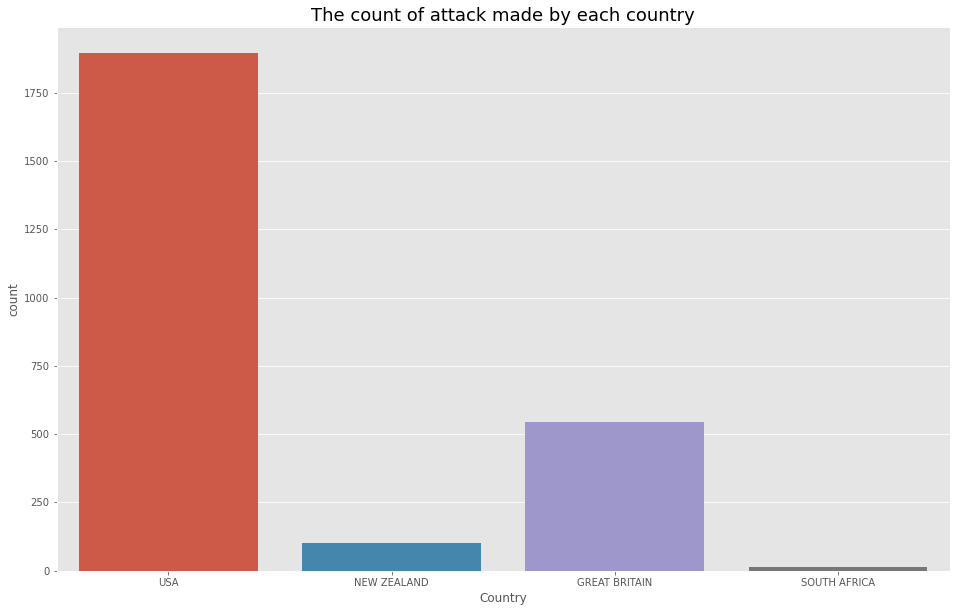

In [14]:
#The count of attack made by each country
print(operations['Country'].value_counts())

# Visualization
plt.figure(figsize=(16,10))
sns.countplot(x='Country', data=operations)
plt.title('The count of attack made by each country', fontsize=18)
plt.show()

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


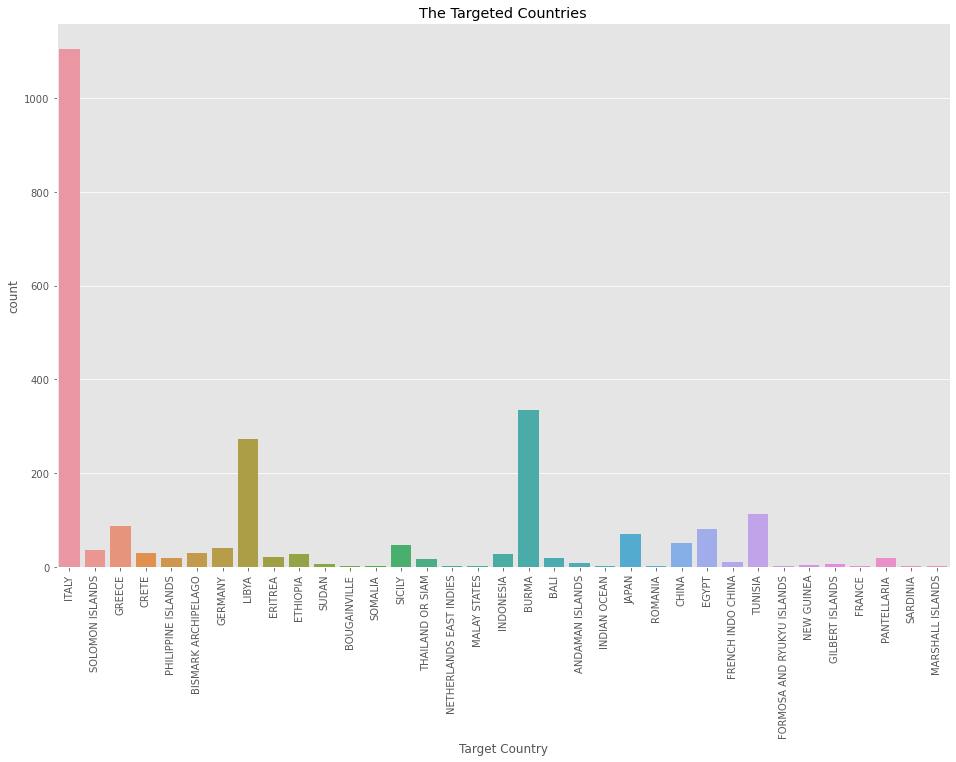

In [15]:
print(operations['Target Country'].value_counts()[0:10])
plt.figure(figsize=(16,10))
sns.countplot(x='Target Country', data=operations)
plt.title('The Targeted Countries')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Aircraft Series

data = operations['Aircraft Series'].value_counts()
data[0:10]

data = [go.Bar(x=data.index, y=data.values, hoverinfo='text', marker = dict(color = 'rgba(1, 1, 1, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))]
layout = dict(title = 'Aircraft Series')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [17]:
# Let's visualize take off bases of countries who attack

data = [dict(
    type='scattergeo',
    lon = operations['Takeoff Longitude'],
    lat=operations['Takeoff Latitude'])
    ]

layout = dict(title = 'Countries Take Off Bases', hovermode='closest')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [18]:
# lets visualize bombing paths which country from which take off base bomb the which countries and cities.

airports = [dict(
        type = 'scattergeo',
        lon = operations['Takeoff Longitude'],
        lat = operations['Takeoff Latitude'])]

targets = [dict(
        type='scattergeo',
          lon = operations['Target Longitude'],
          lat = operations['Target Latitude'])]


fig = dict(data=airports + targets)
iplot(fig)

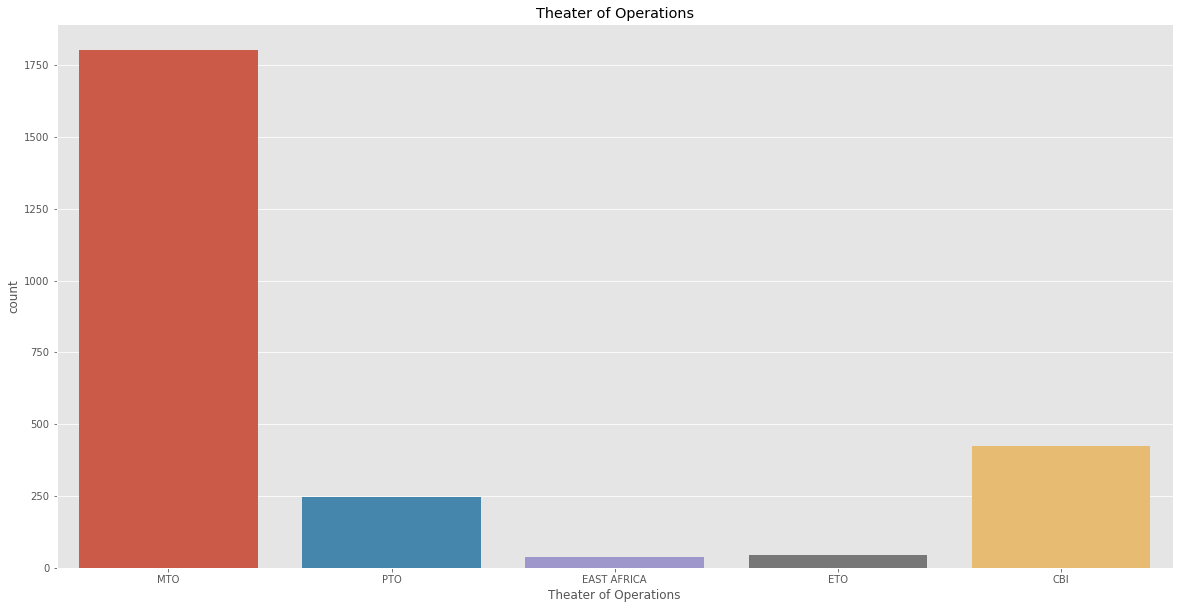

In [19]:
# Theater of operations
plt.figure(figsize=(20,10))
sns.countplot(x='Theater of Operations', data=operations)
plt.title('Theater of Operations')
plt.show()

In [20]:
# weather station locations

data = [dict(
        type = 'scattergeo',
        lon = weather_station_location['Longitude'],
        lat = weather_station_location['Latitude'])]

layout = dict(
        title = 'Weather Station Locations')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Lets focus on the war between USA and BURMA. In this war, USA bomb BURMA (KATHA city) from 1942 to 1945. The closest weather station to this war is BINDUKURI and it has temperature record from 1943 to 1945. Let's visualize this situation. But before visualization, we need to make date features date time object.

/var/folders/4v/qpn1gf993d98k7tty91zpv1m0000gn/T/ipykernel_1921/1612743995.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



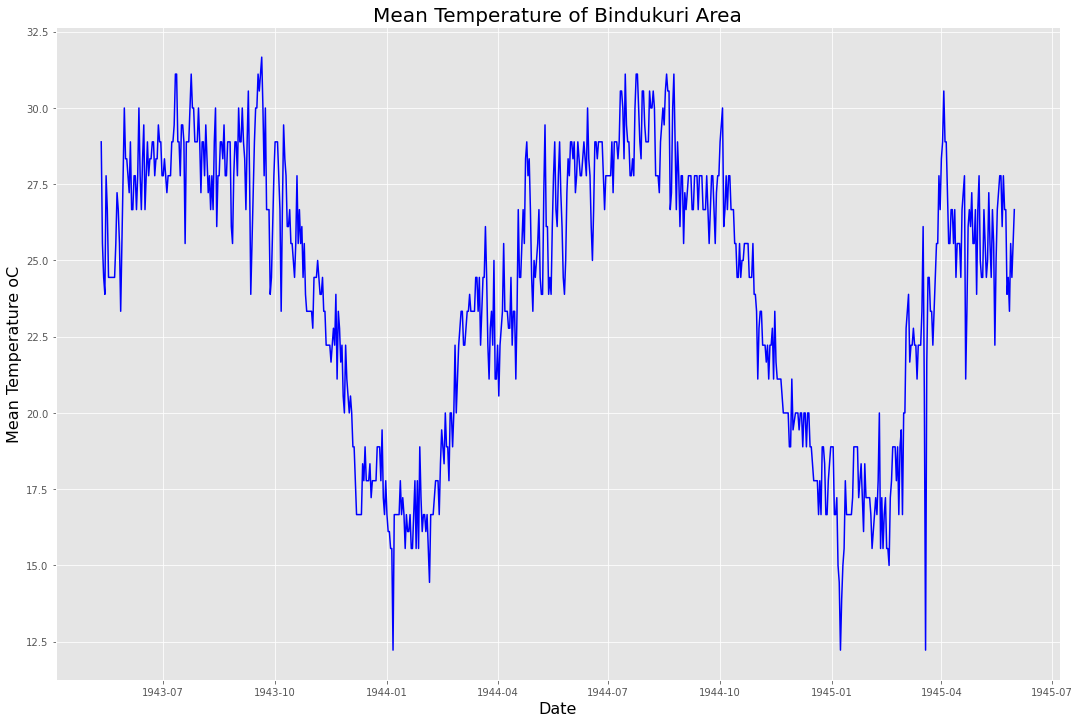

In [21]:
# Let's visualize the war between USA and BURMA

weather_station_id = weather_station_location[weather_station_location['NAME']=='BINDUKURI'].WBAN
weather_bin = weather_summary[weather_summary.STA == 32907]
weather_bin['Date'] = pd.to_datetime(weather_bin['Date'])

plt.figure(figsize=(18,12))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'], color='blue')
plt.title("Mean Temperature of Bindukuri Area",fontsize=20)
plt.xlabel("Date", fontsize=16, color='black')
plt.ylabel("Mean Temperature oC", fontsize=16, color='black')
plt.show()

In [22]:
operations.head()

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90
8,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
9,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,ARMAMENT AND ORDNANCE PLANTS,NaN,38.43,15.90


In [23]:
# To extract the year from the Mission Date:
operations['Year'] = [each.split("/")[2] for each in operations['Mission Date']]
operations['Year']

0         1943
2         1943
3         1943
8         1943
9         1943
          ... 
178032    1943
178033    1943
178034    1943
178035    1943
178080    1943
Name: Year, Length: 2555, dtype: object

In [24]:
# To extract the month from the Mission Date:
operations['month'] = [each.split('/')[0] for each in operations['Mission Date']]
operations['month']

0         8
2         8
3         8
8         8
9         8
         ..
178032    8
178033    8
178034    8
178035    8
178080    8
Name: month, Length: 2555, dtype: object

In [25]:
operations = operations[operations["Year"]>="1943"]
operations = operations[operations["month"]>="8"]

operations["Mission Date"] = pd.to_datetime(operations["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = operations[operations.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

In [26]:
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)


## 6. Time Series Prediction with ARIMA

### What is time series?
* Time series is a collection of data points that are collected at constant time intervals.
* It is time dependent.
* Most of time series have some form of **seasonality trends**. For example, if we sale ice cream, most probably there will be higher sales in summer seasons. Therefore, this time series has seasonality trends.
* Another example, lets think we dice one time every day during 1 year. As you guess, there will be no scenario like that number six is appeared mostly in summer season or number five is mostly appeared in January. Therefore, this time series does not have seasonality trends.

### ARIMA Method

* We will use most used method ARIMA
* ARIMA :  AutoRegressive Integrated Moving Average. I will explain it detailed  at next parts.
* The way that we will follow: 
    * What is Time Series ?
    * Stationarity of a Time Series
    * Make a Time Series Stationary?
    * Forecasting a Time Series

### Stationarity of a Time Series
* There are three basic criterion for a time series to understand whether it is stationary series or not.
    * Statistical properties of time series such as mean, variance should remain constant over time to call **time series is stationary**
        * constant mean
        * constant variance
        * autocovariance that does not depend on time. autocovariance is covariance between time series and lagged time series.

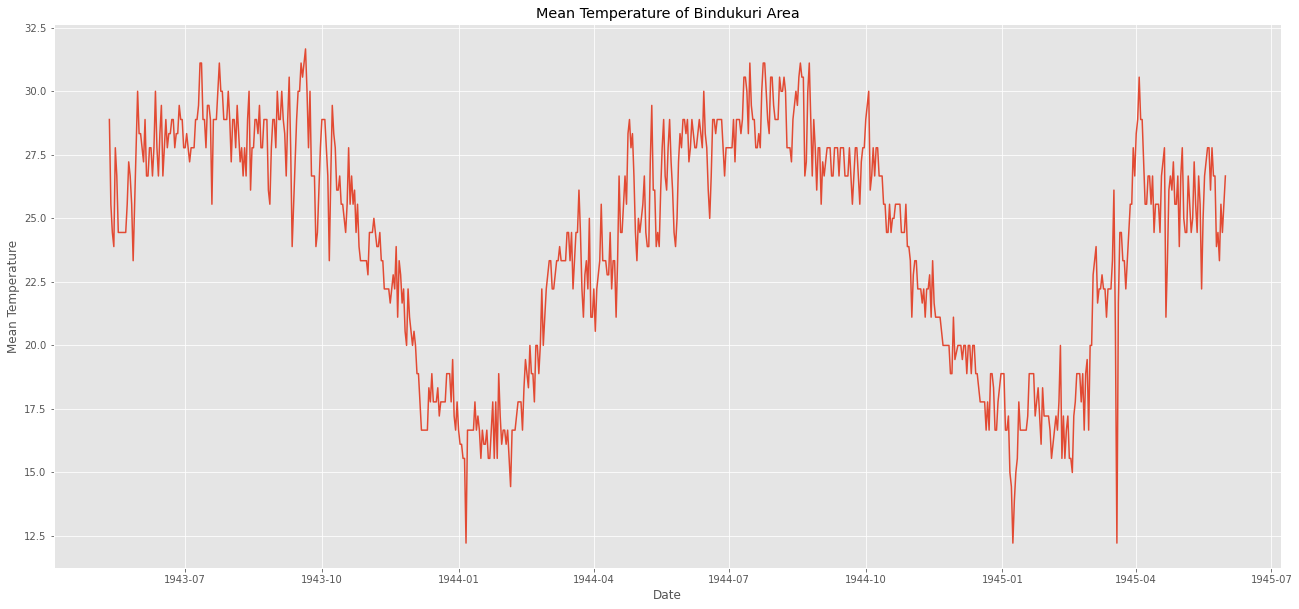

In [27]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# We will create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)


* The time series in the above chart has seasonal variation. In summer, mean temperature is higher than the mean temperature in winter.
* We need now to check whether the time series above is stationary or not using the following methods: 
    * Plotting Rolling Statistics: We have a window lets say window size is 6 and then we find rolling mean and variance to check stationary.
    * Dickey-Fuller Test: The test results comprise of a **Test Statistic** and some **Critical Values** for difference confidence levels. If the **test statistic** is less than the **critical value**, we can say that time series is stationary.

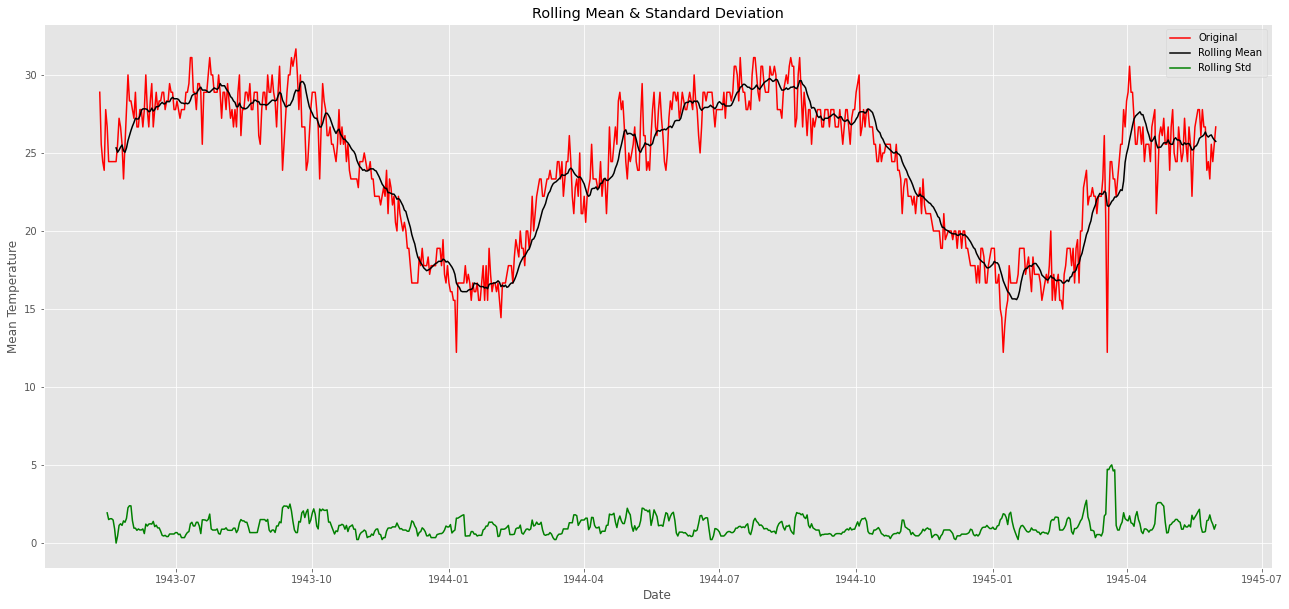

Test statistic:  -1.4095966745887747
p-value:  0.577666802852636
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [28]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller

# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

    # check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)

* Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (no stationary)
* Second one is constant variance. It looks like constant. (yes stationary)
* Third one is that If the **test statistic** is less than the **critical value**, we can say that time series is stationary. Lets look:
    * test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is bigger than the critical values. (no stationary)
* As a result, we sure that our time series is not stationary.
* Lets make time series stationary at the next part.

### Make a Time Series Stationary?

* There are 2 reasons behind non-stationarity of time series:
    1. Trend: Varying mean over time. Therefore, we need constant mean for stationary of time series.
    2. Seasonality: variations at specific time. We need constant variations for stationary of time series.
    
* First solve **trend (constant mean)** problem
    1. Most popular method is moving average.
    2. Moving average: We have window that take the average over the past 'n' sample. 'n' is window size.

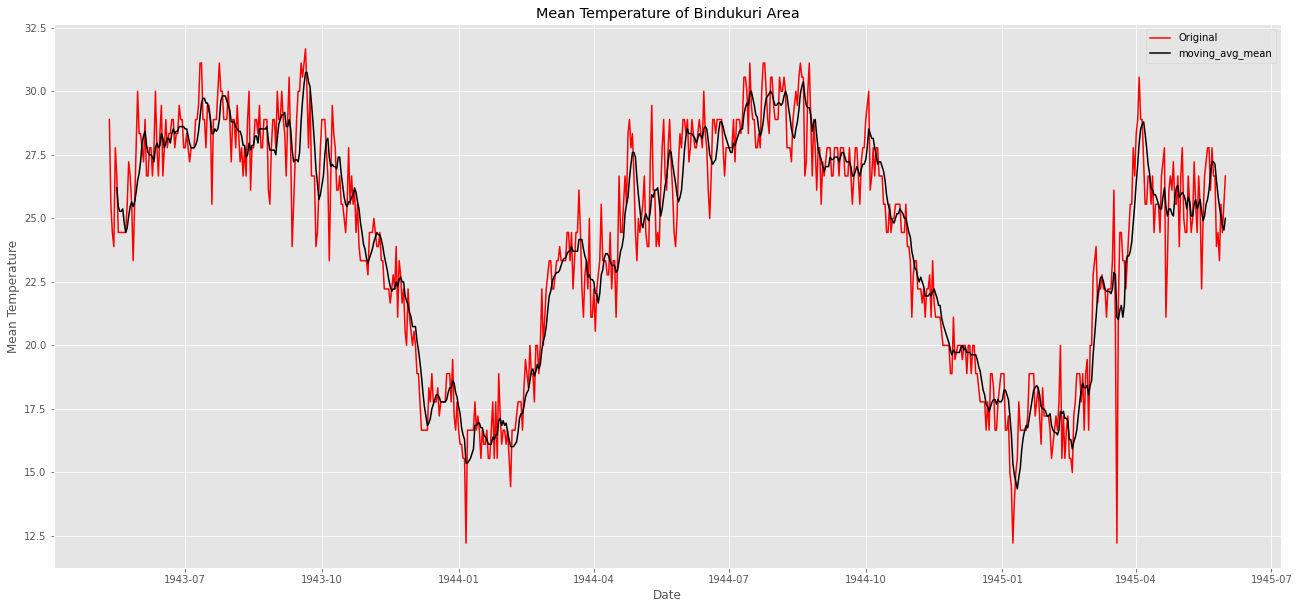

In [29]:
# Moving average method
window_size = 6
moving_avg = ts.rolling(window_size).mean()

plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

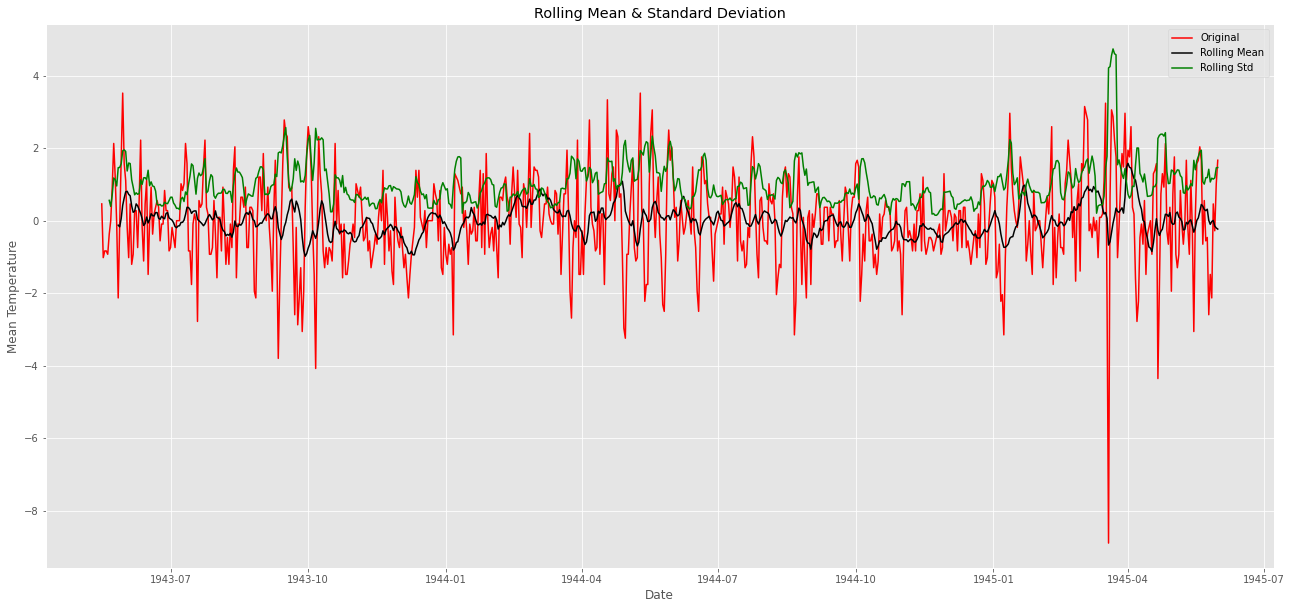

Test statistic:  -11.1385143351385
p-value:  3.150868563164087e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


In [30]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

* Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
* Second one is constant variance. It looks like constant. (yes stationary)
* The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)
* We achieve stationary time series. However lets look at one more method to avoid trend and seasonality.
* Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series. 


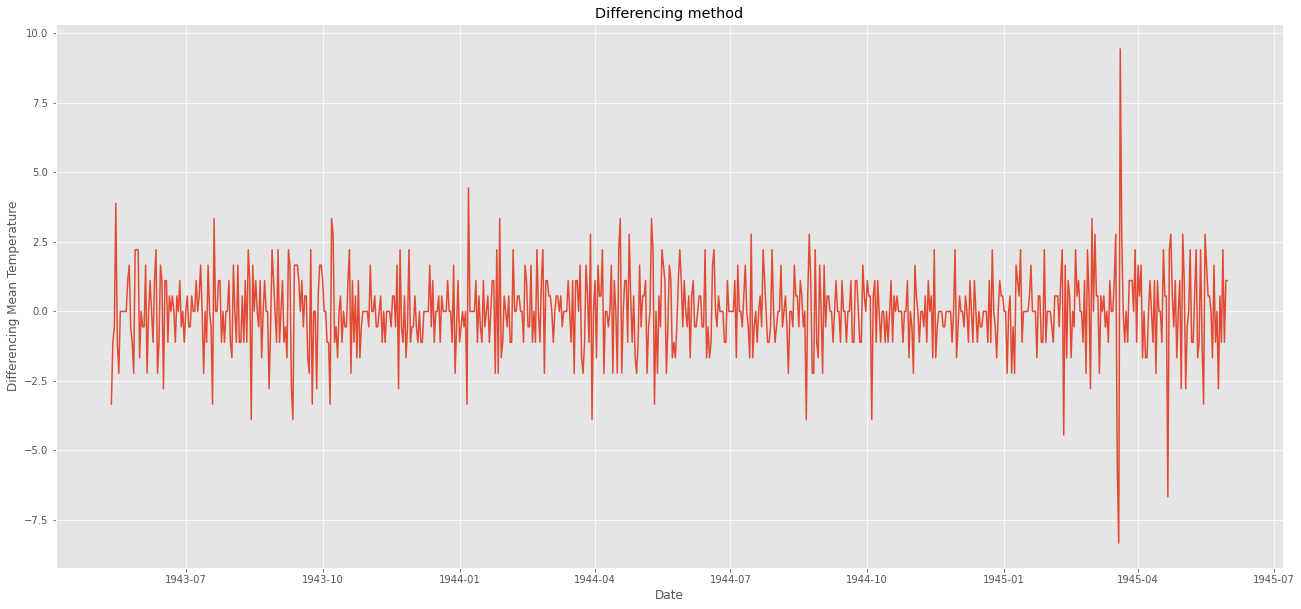

In [31]:
# differencing method
ts_diff = ts - ts.shift()

plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

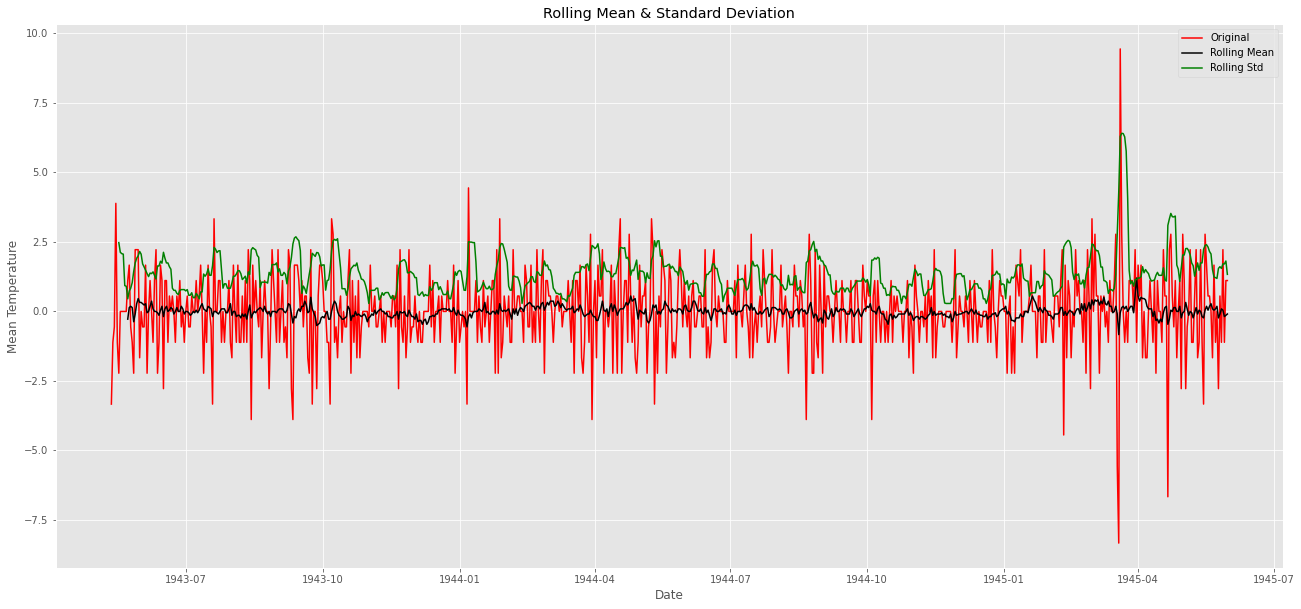

Test statistic:  -11.678955575105364
p-value:  1.7602075693560224e-21
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [32]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)

* Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
* Second one is constant variance. It looks like constant. (yes stationary)
* The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)

### Forecasting a Time Series
* For prediction(forecasting) we will use ts_diff time series that is result of differencing method. Also prediction method is ARIMA that is Auto-Regressive Integrated Moving Averages.
    * AR: Auto-Regressive (p): AR terms are just lags of dependent variable. For example lets say p is 3, we will use  x(t-1), x(t-2) and x(t-3) to predict x(t)
    * I: Integrated (d): These are the number of nonseasonal differences. For example, in our case we take the first order difference. So we pass that variable and put d=0 
    * MA: Moving Averages (q): MA terms are lagged forecast errors in prediction equation.
* (p,d,q) is parameters of ARIMA model.
* In order to choose p,d,q parameters we will use two different plots.
    * Autocorrelation Function (ACF): Measurement of the correlation between time series and lagged version of time series. 
    * Partial Autocorrelation Function (PACF): This measures the correlation between the time series and lagged version of time series but after eliminating the variations already explained by the intervening comparisons. 

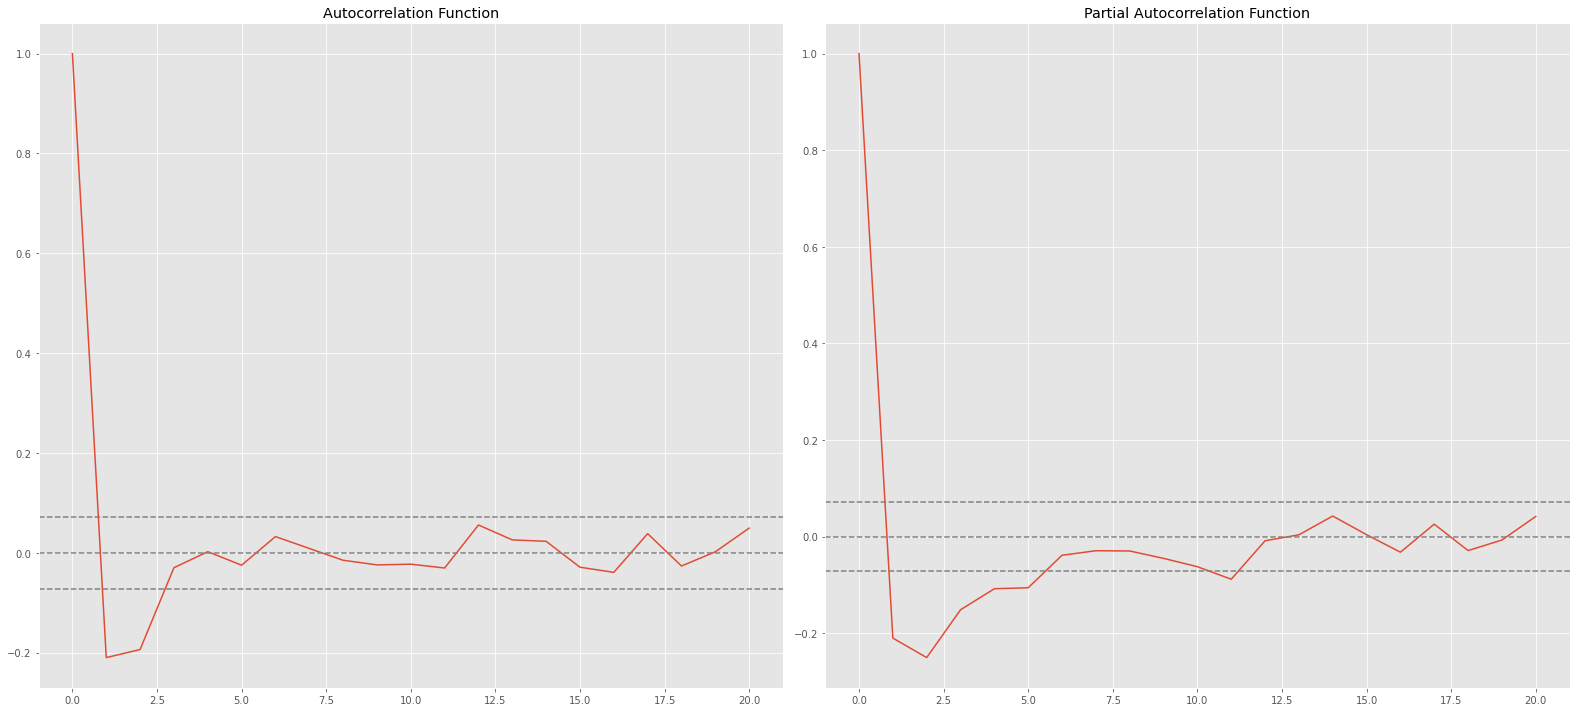

In [33]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values
    * Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time. p=1.
    * Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time. q=1.
* Now lets use (1, 0, 1) as parameters of ARIMA models and predict  
    * ARIMA: from statsmodels libarary
    * datetime: we will use it start and end indexes of predict method

/var/folders/4v/qpn1gf993d98k7tty91zpv1m0000gn/T/ipykernel_1921/2932292598.py:4: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/Users/hamzaelhaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/hamzaelhaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/hamzaelhaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



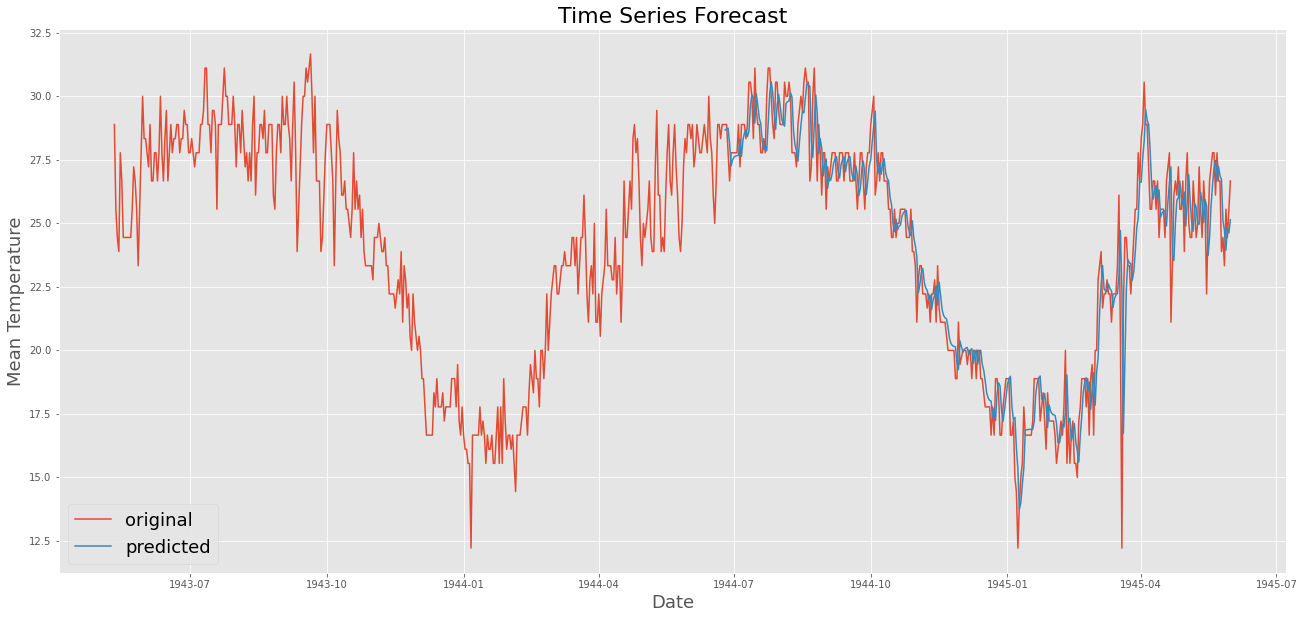

In [34]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pandas import datetime

# fit model
model = sm.tsa.arima.ARIMA(ts, order=(1,0,1))
model_fit = model.fit()

# predict
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start=start_index, end = end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp, label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast", fontsize=22)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Mean Temperature", fontsize=18)
plt.legend(fontsize=18)
plt.show()

Let's predict and visualize all path and find mean squared error

/Users/hamzaelhaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/hamzaelhaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/hamzaelhaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



error:  1.8625810285923425


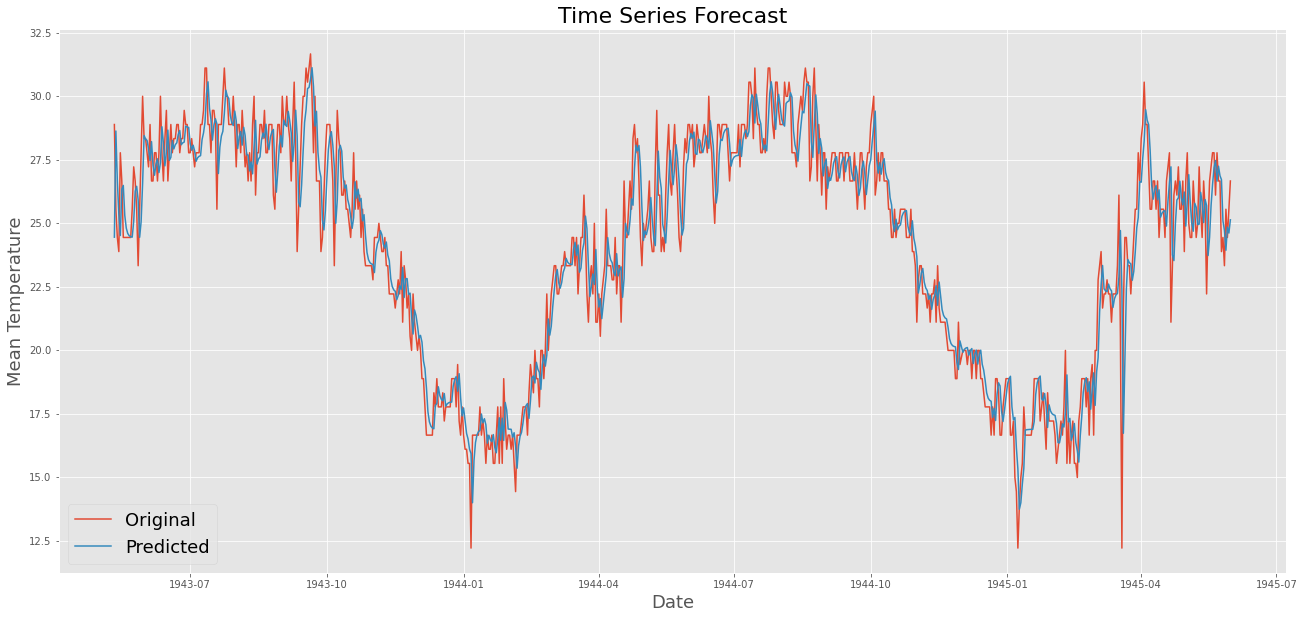

In [35]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = sm.tsa.arima.ARIMA(ts, order=(1,0,1))
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: ", error)


# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date, weather_bin.MeanTemp, label = "Original")
plt.plot(forecast2, label = "Predicted")
plt.title("Time Series Forecast", fontsize=22)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Mean Temperature", fontsize=18)
plt.legend(fontsize=18)
plt.savefig('Time Series Forcast.png')

plt.show()

## Summary

* We have created a model that can predict the Mean Temperature for a certain period of time based on the data we collected. We can see that there is almost an exact match between the Original and predicted lines with MSE of 1.86, which is an indicater of the good predictability of our model. 

* Therefore, we can apply this method to predic similar events in the future based on similar data.